<a href="https://colab.research.google.com/github/cateto/python4NLP/blob/main/20220919/%EC%A3%BC%EC%A0%9C%EB%B6%84%EB%A5%98(model_v3).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd

In [2]:
import os
abs_path = '/content/drive/MyDrive/DL/topic_class_POC/v2'
dir_arr = os.listdir(abs_path)

In [3]:
dir_arr

['data_20220117_1.xlsx',
 'data_20210507.xlsx',
 'data_201005.xlsx',
 'none_tagging_lucy_topic_test_v3.0.csv',
 'lucy_topic_train_v3.0.csv',
 'lucy_topic_test_v3.0.csv']

In [4]:
latest_data_path = os.path.join(abs_path,dir_arr[0])

latest_data = pd.read_excel(latest_data_path)

In [5]:
len(latest_data)

22943

In [6]:
latest_data = latest_data.drop_duplicates() #중복제거
len(latest_data)

22607

In [7]:
latest_data.head()

,수집일시,주제 소분류,제목,내용,검토결과,오분류 유형
0,20211130,정책,전남 앞바다 함께 계획하고 이용해요,해양공간관리계획 공청회 열어 주민·전문가 의견 수렴 \n ▲ 전남도청 [전남/스...,1,NaN
1,20211130,정책,"도송중, 구미 청소년 JTS, 최우수상 쾌거","[구미뉴스]=구미청소년JTS동아리 (도송중 3학년 김민재, 노희수, 류혜림, 박수연...",1,NaN
2,20211130,정책,"새로운대전위원회, 대전의 새로운 미래를 논하다","정형근 기자 = 대전시는 30일, 대전평생교육진흥원에서 공직자와 새로운대전위원회 위...",1,NaN
3,20211130,정책,"울릉중, 청소년 사회 참여 및 정책제안 공모전 우수상",[경상매일신문=조영삼기자]울릉중학교가 경상북도 교육청에서 최근 개최한 ‘청소년 사회...,1,NaN
4,20211130,정책,"대구시, 전국 최초 대중교통 마일리지제도 시행",대구시 제공 \n[경상매일신문=김영식기자] 대구시가 내년에 새로운 승용차요일...,1,NaN


In [8]:
lastest_data = latest_data.dropna(how='all', subset=['제목', '내용'])
len(latest_data)

22607

In [9]:
second_data_path = os.path.join(abs_path,dir_arr[1])

second_data = pd.read_excel(second_data_path)

In [10]:
second_data.head()

,문서번호,일자,제목,내용,주제 소분류,검토결과,오분류 유형
0,DC000000008462043601,20210303,근데 이거봐 ㅋㅋㅋㅋ 친문에서 유시민 대선 부추기나봐,https://n.news.naver.com/article/025/000308144...,정당,1,NaN
1,DC000000008462043611,20210303,유시민이 대선안나가더라도 이재명견제용으로 나올순잇다봄,친문 새후보한테 지지율 높혀서 전달할 중간다리 이런용도로 이재명한테 안밀리는네임드중...,정당,1,NaN
2,DC000000008462043564,20210303,대전 세종쪽은 윤석열 나오면 누구 뽑을지 궁금하다,현재는 싹다 민주당 올킬인데 \n윤석열 나오면 어캐 되려나 \n출신 대통령 vs 그...,정당,1,NaN
3,DC000000008462043686,20210303,내가 진보 좋아하면서 졸라 싫어하는 이유,1.진보지향하는새끼들 보면 거의 대부분\n잘난척이 하늘을 찌름\n인간의 허영심중에 ...,정당,1,NaN
4,DC000000008462043569,20210303,"코로나 끝난 후, 민주당의 변명 예상.",코로나가 끝날 줄 몰랐으니까 독재를 했다.\n이럴듯,정당,1,NaN


In [11]:
second_data = second_data.drop_duplicates() #중복제거
print(len(second_data))
second_data = second_data.dropna(how='all', subset=['제목', '내용']) #결측치제거
print(len(second_data))

20938
20938


In [12]:
third_data_path = os.path.join(abs_path,dir_arr[2])

third_data = pd.read_excel(third_data_path)

In [13]:
third_data.head()

,문서번호,일자,제목,내용,주제 1순위,검토결과,오분류 유형
0,UT000000007798724050,20200903,"DSLR, 뭐가 좋은거지? / 이벤트픽이 쓰는 카메라! #니콘 #캐논 #행사전문스튜디오","안녕하세요, 이벤트픽입니다 :) 이번 영상은 카메라 기종에 대해, 어떤 카메라가 좋...",가전,1,NaN
1,QA000000007798712796,20200903,멜론 mp3 30개 다운 정기결재 신청하고 바로 해지하면 이번 1회만 결재되는거 맞...,내공100 \n 멜론 mp3 30개 다운 정기결재 신청하고 바로 해지하면 이번 1...,가전,1,NaN
2,TW1301533065143967745,20200903,가습기 쓰는 사람..................잇으면 추천좀,NaN,가전,1,NaN
3,TW1301534522253565952,20200903,최신가전 파격 지원! 낸 돈은 전액 그대로 100% 환급. https://t.co/...,NaN,가전,1,NaN
4,CF000000007798713901,20200903,[질문] 126동(1/2호라인) 9월 입주예정일 문의,"저희가 9월 26일 입주예정이고,\n\n새로 구입한 가구나 가전 등이 9월19일에 ...",가전,1,NaN


In [14]:
third_data = third_data.drop_duplicates() #중복제거
print(len(third_data))
third_data = third_data.dropna(how='all', subset=['제목', '내용']) #결측치제거
print(len(third_data))

20547
20547


In [15]:
col_name = ['contents', 'topic_rule', 'topic_human', 'is_correct']

In [16]:
inter_data = pd.DataFrame(columns=col_name)

In [17]:
inter_data

,contents,topic_rule,topic_human,is_correct


In [18]:
lastest_data['contents'] = -1
lastest_data['contents'] = latest_data[['제목','내용']].apply(lambda row: ' '.join(row.values.astype(str)), axis=1)

In [19]:
lastest_data['topic_rule'] = -1
lastest_data['topic_rule'] = latest_data['주제 소분류']
lastest_data['is_correct'] = -1
lastest_data['is_correct'] = latest_data['검토결과']
lastest_data['topic_human'] = -1

In [20]:
lastest_data.head()

,수집일시,주제 소분류,제목,내용,검토결과,오분류 유형,contents,topic_rule,is_correct,topic_human
0,20211130,정책,전남 앞바다 함께 계획하고 이용해요,해양공간관리계획 공청회 열어 주민·전문가 의견 수렴 \n ▲ 전남도청 [전남/스...,1,NaN,전남 앞바다 함께 계획하고 이용해요 해양공간관리계획 공청회 열어 주민·전문가 의견 ...,정책,1,-1
1,20211130,정책,"도송중, 구미 청소년 JTS, 최우수상 쾌거","[구미뉴스]=구미청소년JTS동아리 (도송중 3학년 김민재, 노희수, 류혜림, 박수연...",1,NaN,"도송중, 구미 청소년 JTS, 최우수상 쾌거 [구미뉴스]=구미청소년JTS동아리 (도...",정책,1,-1
2,20211130,정책,"새로운대전위원회, 대전의 새로운 미래를 논하다","정형근 기자 = 대전시는 30일, 대전평생교육진흥원에서 공직자와 새로운대전위원회 위...",1,NaN,"새로운대전위원회, 대전의 새로운 미래를 논하다 정형근 기자 = 대전시는 30일, 대...",정책,1,-1
3,20211130,정책,"울릉중, 청소년 사회 참여 및 정책제안 공모전 우수상",[경상매일신문=조영삼기자]울릉중학교가 경상북도 교육청에서 최근 개최한 ‘청소년 사회...,1,NaN,"울릉중, 청소년 사회 참여 및 정책제안 공모전 우수상 [경상매일신문=조영삼기자]울릉...",정책,1,-1
4,20211130,정책,"대구시, 전국 최초 대중교통 마일리지제도 시행",대구시 제공 \n[경상매일신문=김영식기자] 대구시가 내년에 새로운 승용차요일...,1,NaN,"대구시, 전국 최초 대중교통 마일리지제도 시행 대구시 제공 \n[경상매일신문...",정책,1,-1


In [21]:
inter_data = inter_data.append(lastest_data[col_name], ignore_index = True)

In [22]:
inter_data

,contents,topic_rule,topic_human,is_correct
0,전남 앞바다 함께 계획하고 이용해요 해양공간관리계획 공청회 열어 주민·전문가 의견 ...,정책,-1,1
1,"도송중, 구미 청소년 JTS, 최우수상 쾌거 [구미뉴스]=구미청소년JTS동아리 (도...",정책,-1,1
2,"새로운대전위원회, 대전의 새로운 미래를 논하다 정형근 기자 = 대전시는 30일, 대...",정책,-1,1
3,"울릉중, 청소년 사회 참여 및 정책제안 공모전 우수상 [경상매일신문=조영삼기자]울릉...",정책,-1,1
4,"대구시, 전국 최초 대중교통 마일리지제도 시행 대구시 제공 \n[경상매일신문...",정책,-1,1
...,...,...,...,...
22602,[전국] 2021년 3회 광교바이오 헬스 포럼 개최 안내 개요 \n경기도경제과학진...,바이오,-1,1
22603,[국립산림과학원] 목질계 바이오플라스틱 연구의 교두보를 마련하다! - 국립산림과학원...,바이오,-1,1
22604,‘2021 빅3(Big3) 성과공유 컨퍼런스’ 개최 ‘2021 빅3(Big3) 성과...,바이오,-1,1
22605,‘2021 빅3(Big3) 성과공유 컨퍼런스’ 개최 ‘2021 빅3(Big3) 성과...,바이오,-1,1


In [23]:
second_data['contents'] = -1
second_data['contents'] = second_data[['제목','내용']].apply(lambda row: ' '.join(row.values.astype(str)), axis=1)

In [24]:
second_data['topic_rule'] = -1
second_data['topic_rule'] = second_data['주제 소분류']
second_data['is_correct'] = -1
second_data['is_correct'] = second_data['검토결과']
second_data['topic_human'] = -1

In [25]:
second_data.head()

,문서번호,일자,제목,내용,주제 소분류,검토결과,오분류 유형,contents,topic_rule,is_correct,topic_human
0,DC000000008462043601,20210303,근데 이거봐 ㅋㅋㅋㅋ 친문에서 유시민 대선 부추기나봐,https://n.news.naver.com/article/025/000308144...,정당,1,NaN,근데 이거봐 ㅋㅋㅋㅋ 친문에서 유시민 대선 부추기나봐 https://n.news.n...,정당,1,-1
1,DC000000008462043611,20210303,유시민이 대선안나가더라도 이재명견제용으로 나올순잇다봄,친문 새후보한테 지지율 높혀서 전달할 중간다리 이런용도로 이재명한테 안밀리는네임드중...,정당,1,NaN,유시민이 대선안나가더라도 이재명견제용으로 나올순잇다봄 친문 새후보한테 지지율 높혀서...,정당,1,-1
2,DC000000008462043564,20210303,대전 세종쪽은 윤석열 나오면 누구 뽑을지 궁금하다,현재는 싹다 민주당 올킬인데 \n윤석열 나오면 어캐 되려나 \n출신 대통령 vs 그...,정당,1,NaN,대전 세종쪽은 윤석열 나오면 누구 뽑을지 궁금하다 현재는 싹다 민주당 올킬인데 \n...,정당,1,-1
3,DC000000008462043686,20210303,내가 진보 좋아하면서 졸라 싫어하는 이유,1.진보지향하는새끼들 보면 거의 대부분\n잘난척이 하늘을 찌름\n인간의 허영심중에 ...,정당,1,NaN,내가 진보 좋아하면서 졸라 싫어하는 이유 1.진보지향하는새끼들 보면 거의 대부분\n...,정당,1,-1
4,DC000000008462043569,20210303,"코로나 끝난 후, 민주당의 변명 예상.",코로나가 끝날 줄 몰랐으니까 독재를 했다.\n이럴듯,정당,1,NaN,"코로나 끝난 후, 민주당의 변명 예상. 코로나가 끝날 줄 몰랐으니까 독재를 했다.\...",정당,1,-1


In [26]:
inter_data = inter_data.append(second_data[col_name], ignore_index = True)

In [27]:
inter_data

,contents,topic_rule,topic_human,is_correct
0,전남 앞바다 함께 계획하고 이용해요 해양공간관리계획 공청회 열어 주민·전문가 의견 ...,정책,-1,1
1,"도송중, 구미 청소년 JTS, 최우수상 쾌거 [구미뉴스]=구미청소년JTS동아리 (도...",정책,-1,1
2,"새로운대전위원회, 대전의 새로운 미래를 논하다 정형근 기자 = 대전시는 30일, 대...",정책,-1,1
3,"울릉중, 청소년 사회 참여 및 정책제안 공모전 우수상 [경상매일신문=조영삼기자]울릉...",정책,-1,1
4,"대구시, 전국 최초 대중교통 마일리지제도 시행 대구시 제공 \n[경상매일신문...",정책,-1,1
...,...,...,...,...
43540,"주상하이총영사, 주재국 언론(제일재경(第一財經)) 인터뷰 □ 매체 및 기고 일시 :...",금융/금리,-1,1
43541,한국은행 앞 한국은행 앞,금융/금리,-1,0
43542,2021년 1월 수출입 무역 동향 (관할지역 5개현) ※ 주히로시마총영사관 관할지역...,금융/금리,-1,1
43543,4차 재난지원금 집합제한업종에 매출비교는 너무 잔인하고 불공정합니다. 오늘 기획재정...,금융/금리,-1,1


In [28]:
third_data['contents'] = -1
third_data['contents'] = third_data[['제목','내용']].apply(lambda row: ' '.join(row.values.astype(str)), axis=1)

In [29]:
third_data['topic_rule'] = -1
third_data['topic_rule'] = third_data['주제 1순위']
third_data['is_correct'] = -1
third_data['is_correct'] = third_data['검토결과']
third_data['topic_human'] = -1

In [30]:
third_data.head()

,문서번호,일자,제목,내용,주제 1순위,검토결과,오분류 유형,contents,topic_rule,is_correct,topic_human
0,UT000000007798724050,20200903,"DSLR, 뭐가 좋은거지? / 이벤트픽이 쓰는 카메라! #니콘 #캐논 #행사전문스튜디오","안녕하세요, 이벤트픽입니다 :) 이번 영상은 카메라 기종에 대해, 어떤 카메라가 좋...",가전,1,NaN,"DSLR, 뭐가 좋은거지? / 이벤트픽이 쓰는 카메라! #니콘 #캐논 #행사전문스튜...",가전,1,-1
1,QA000000007798712796,20200903,멜론 mp3 30개 다운 정기결재 신청하고 바로 해지하면 이번 1회만 결재되는거 맞...,내공100 \n 멜론 mp3 30개 다운 정기결재 신청하고 바로 해지하면 이번 1...,가전,1,NaN,멜론 mp3 30개 다운 정기결재 신청하고 바로 해지하면 이번 1회만 결재되는거 맞...,가전,1,-1
2,TW1301533065143967745,20200903,가습기 쓰는 사람..................잇으면 추천좀,NaN,가전,1,NaN,가습기 쓰는 사람..................잇으면 추천좀 nan,가전,1,-1
3,TW1301534522253565952,20200903,최신가전 파격 지원! 낸 돈은 전액 그대로 100% 환급. https://t.co/...,NaN,가전,1,NaN,최신가전 파격 지원! 낸 돈은 전액 그대로 100% 환급. https://t.co/...,가전,1,-1
4,CF000000007798713901,20200903,[질문] 126동(1/2호라인) 9월 입주예정일 문의,"저희가 9월 26일 입주예정이고,\n\n새로 구입한 가구나 가전 등이 9월19일에 ...",가전,1,NaN,[질문] 126동(1/2호라인) 9월 입주예정일 문의 저희가 9월 26일 입주예정이...,가전,1,-1


In [31]:
inter_data = inter_data.append(third_data[col_name], ignore_index = True)

In [32]:
inter_data

,contents,topic_rule,topic_human,is_correct
0,전남 앞바다 함께 계획하고 이용해요 해양공간관리계획 공청회 열어 주민·전문가 의견 ...,정책,-1,1
1,"도송중, 구미 청소년 JTS, 최우수상 쾌거 [구미뉴스]=구미청소년JTS동아리 (도...",정책,-1,1
2,"새로운대전위원회, 대전의 새로운 미래를 논하다 정형근 기자 = 대전시는 30일, 대...",정책,-1,1
3,"울릉중, 청소년 사회 참여 및 정책제안 공모전 우수상 [경상매일신문=조영삼기자]울릉...",정책,-1,1
4,"대구시, 전국 최초 대중교통 마일리지제도 시행 대구시 제공 \n[경상매일신문...",정책,-1,1
...,...,...,...,...
64087,홈캉스를 더 빛나게 하는 인천 아파트 유리창 청소☆영종힐스테이트아파트☆ 안녕하세요\...,환경오염,-1,1
64088,@_listk 불끄고 티비보면 눈 나빠져여~!! (황사때 세차하면 기스나여 톤으로)...,환경오염,-1,1
64089,황사빼기재밋어 https://t.co/qDDj2IWLXI nan,환경오염,-1,1
64090,생각만 해도 행복하다.. 역시 난 가을 겨울이 좋은 fw 인간이야 봄엔 황사 때문에...,환경오염,-1,1


In [33]:
inter_data.loc[inter_data['topic_rule'] == '공연,전시','topic_rule'] = '공연/전시'

In [34]:
inter_data.loc[inter_data['topic_rule'] == '금융 / 금리','topic_rule'] = '금융/금리'
inter_data.loc[inter_data['topic_rule'] == '금융,금리','topic_rule'] = '금융/금리'

In [35]:
inter_data.loc[inter_data['topic_rule'] == '스포츠 일반','topic_rule'] = '스포츠일반'

In [36]:
inter_data.loc[inter_data['topic_rule'] == '여행,레저','topic_rule'] = '여행/레저'

In [37]:
inter_data.loc[inter_data['topic_rule'] == '유통,쇼핑,물류','topic_rule'] = '유통/쇼핑/물류'

In [38]:
inter_data.loc[inter_data['topic_rule'] == '취미,반려동물,라이프스타일','topic_rule'] = '취미/반려동물/라이프스타일'
inter_data.loc[inter_data['topic_rule'] == '취미/반려동물/라이프 스타일','topic_rule'] = '취미/반려동물/라이프스타일'

In [39]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
encoder.fit(inter_data['topic_rule'])
inter_data['topic_human'] = encoder.transform(inter_data['topic_rule'])

In [40]:
# print labels
labels = []
for i, label in enumerate(encoder.classes_):
    labels.append({'label_id' : i, 'label_name': label})
    print(i, '->', label)

0 -> 가전
1 -> 건설
2 -> 게임
3 -> 골프
4 -> 공연/전시
5 -> 교육
6 -> 국방안보
7 -> 금융/금리
8 -> 농구
9 -> 다문화
10 -> 도서
11 -> 레져산업
12 -> 모바일
13 -> 바이오
14 -> 반도체
15 -> 방송
16 -> 배구
17 -> 법조
18 -> 보건복지
19 -> 부동산
20 -> 사건사고
21 -> 석유
22 -> 스포츠일반
23 -> 식품
24 -> 야구
25 -> 에너지
26 -> 여행/레저
27 -> 연예일반
28 -> 영화
29 -> 외교
30 -> 유통/쇼핑/물류
31 -> 음식
32 -> 음악
33 -> 의료
34 -> 인터넷
35 -> 자동차
36 -> 재해
37 -> 전자
38 -> 정당
39 -> 정부
40 -> 정책
41 -> 제철
42 -> 종교
43 -> 증권
44 -> 지자체
45 -> 축구
46 -> 취미/반려동물/라이프스타일
47 -> 친환경
48 -> 컴퓨터
49 -> 통신
50 -> 패션
51 -> 화학
52 -> 환경오염


In [41]:
labels

[{'label_id': 0, 'label_name': '가전'},
 {'label_id': 1, 'label_name': '건설'},
 {'label_id': 2, 'label_name': '게임'},
 {'label_id': 3, 'label_name': '골프'},
 {'label_id': 4, 'label_name': '공연/전시'},
 {'label_id': 5, 'label_name': '교육'},
 {'label_id': 6, 'label_name': '국방안보'},
 {'label_id': 7, 'label_name': '금융/금리'},
 {'label_id': 8, 'label_name': '농구'},
 {'label_id': 9, 'label_name': '다문화'},
 {'label_id': 10, 'label_name': '도서'},
 {'label_id': 11, 'label_name': '레져산업'},
 {'label_id': 12, 'label_name': '모바일'},
 {'label_id': 13, 'label_name': '바이오'},
 {'label_id': 14, 'label_name': '반도체'},
 {'label_id': 15, 'label_name': '방송'},
 {'label_id': 16, 'label_name': '배구'},
 {'label_id': 17, 'label_name': '법조'},
 {'label_id': 18, 'label_name': '보건복지'},
 {'label_id': 19, 'label_name': '부동산'},
 {'label_id': 20, 'label_name': '사건사고'},
 {'label_id': 21, 'label_name': '석유'},
 {'label_id': 22, 'label_name': '스포츠일반'},
 {'label_id': 23, 'label_name': '식품'},
 {'label_id': 24, 'label_name': '야구'},
 {'label_id':

In [42]:
temp_df = pd.DataFrame(labels)

In [43]:
temp_df.to_csv('topic_label.csv',  index=False, encoding="utf-8-sig")

In [44]:
inter_data

,contents,topic_rule,topic_human,is_correct
0,전남 앞바다 함께 계획하고 이용해요 해양공간관리계획 공청회 열어 주민·전문가 의견 ...,정책,40,1
1,"도송중, 구미 청소년 JTS, 최우수상 쾌거 [구미뉴스]=구미청소년JTS동아리 (도...",정책,40,1
2,"새로운대전위원회, 대전의 새로운 미래를 논하다 정형근 기자 = 대전시는 30일, 대...",정책,40,1
3,"울릉중, 청소년 사회 참여 및 정책제안 공모전 우수상 [경상매일신문=조영삼기자]울릉...",정책,40,1
4,"대구시, 전국 최초 대중교통 마일리지제도 시행 대구시 제공 \n[경상매일신문...",정책,40,1
...,...,...,...,...
64087,홈캉스를 더 빛나게 하는 인천 아파트 유리창 청소☆영종힐스테이트아파트☆ 안녕하세요\...,환경오염,52,1
64088,@_listk 불끄고 티비보면 눈 나빠져여~!! (황사때 세차하면 기스나여 톤으로)...,환경오염,52,1
64089,황사빼기재밋어 https://t.co/qDDj2IWLXI nan,환경오염,52,1
64090,생각만 해도 행복하다.. 역시 난 가을 겨울이 좋은 fw 인간이야 봄엔 황사 때문에...,환경오염,52,1


In [45]:
# 오분류 정분류 비율
inter_data["is_correct"].value_counts() / len(inter_data)

1    0.810928
0    0.189072
Name: is_correct, dtype: float64

In [46]:
# 오분류 정분류 모수
inter_data["is_correct"].value_counts()

1    51974
0    12118
Name: is_correct, dtype: int64

In [47]:
# 정분류, 오분류 데이터 샘플링 (75% : 25%의 비율로 샘플링)
c_data = inter_data.query('is_correct==1')
ic_data = inter_data.query('is_correct!=1')

In [48]:
len(c_data)

51974

In [49]:
len(ic_data)

12118

In [50]:
# 샘플링
c_data = c_data[:50000]
c_data = c_data.reset_index(drop = True)
ic_data = ic_data[:12000]
ic_data = ic_data.reset_index(drop = True)

In [51]:
c_data

,contents,topic_rule,topic_human,is_correct
0,전남 앞바다 함께 계획하고 이용해요 해양공간관리계획 공청회 열어 주민·전문가 의견 ...,정책,40,1
1,"도송중, 구미 청소년 JTS, 최우수상 쾌거 [구미뉴스]=구미청소년JTS동아리 (도...",정책,40,1
2,"새로운대전위원회, 대전의 새로운 미래를 논하다 정형근 기자 = 대전시는 30일, 대...",정책,40,1
3,"울릉중, 청소년 사회 참여 및 정책제안 공모전 우수상 [경상매일신문=조영삼기자]울릉...",정책,40,1
4,"대구시, 전국 최초 대중교통 마일리지제도 시행 대구시 제공 \n[경상매일신문...",정책,40,1
...,...,...,...,...
49995,[리뷰9] 테크닉 42061 텔레핸들러 리뷰 입니다 [제품정보]\n\n1.제품번호/...,취미/반려동물/라이프스타일,46,1
49996,*텍관 글!(시간이 지나면 사라집니다:)\n\n프로필에 대략적인 내용이 적혀있지만\...,취미/반려동물/라이프스타일,46,1
49997,시안 요청합니다:) 1. 상담내용 : 컬러전차스\n\n​\n\n2. 제작크기 : 흰...,취미/반려동물/라이프스타일,46,1
49998,10월이 둘째 돌인데.. 돌잔치는 취소했고..\n\n가족들끼리 소규모로 사진찍어주며...,취미/반려동물/라이프스타일,46,1


In [52]:
# train, test = train_test_split(inter_data, test_size=0.2, random_state=42)

In [53]:
# 오분류 데이터로부터 균등하게 test data 샘플링
from sklearn.model_selection import StratifiedShuffleSplit
split = StratifiedShuffleSplit(n_splits = 2 , test_size = 0.01, random_state = 42)
for train_idx, test_idx in split.split(ic_data, ic_data["topic_rule"]):
  df_idc_strat_train = ic_data.loc[train_idx]
  df_idc_strat_test = ic_data.loc[test_idx]

In [54]:
len(df_idc_strat_test)

120

In [55]:
df_idc_strat_test.to_csv(os.path.join(abs_path, 'none_tagging_lucy_topic_test_v3.0.csv'), index=False, encoding="utf-8-sig")

In [56]:
df_idc_strat_test["topic_human"].value_counts() / len(df_idc_strat_test) # dataset 라벨 비율

15    0.041667
35    0.041667
45    0.033333
20    0.033333
26    0.033333
49    0.033333
29    0.033333
12    0.033333
31    0.033333
7     0.025000
19    0.025000
41    0.025000
21    0.025000
16    0.025000
23    0.025000
24    0.025000
8     0.025000
48    0.025000
51    0.025000
14    0.025000
22    0.025000
36    0.025000
38    0.016667
17    0.016667
3     0.016667
46    0.016667
43    0.016667
28    0.016667
33    0.016667
25    0.016667
0     0.016667
44    0.016667
42    0.016667
1     0.016667
6     0.016667
4     0.016667
11    0.016667
47    0.016667
50    0.008333
32    0.008333
18    0.008333
37    0.008333
40    0.008333
27    0.008333
10    0.008333
34    0.008333
9     0.008333
2     0.008333
52    0.008333
Name: topic_human, dtype: float64

In [57]:
# 정분류 데이터로부터 균등하게 test data 샘플링
from sklearn.model_selection import StratifiedShuffleSplit
split = StratifiedShuffleSplit(n_splits = 2 , test_size = 0.008, random_state = 42)
for train_idx, test_idx in split.split(c_data, c_data["topic_rule"]):
  df_strat_train = c_data.loc[train_idx]
  df_strat_test = c_data.loc[test_idx]

In [58]:
inter_data["topic_human"].value_counts() / len(inter_data) # dataset 라벨 비율

42    0.020892
10    0.020455
26    0.020377
32    0.020377
15    0.020346
38    0.020330
4     0.020252
27    0.020252
31    0.020205
36    0.020159
39    0.020034
11    0.020034
28    0.019956
29    0.019737
40    0.019690
6     0.019690
2     0.019659
5     0.019628
18    0.019612
20    0.019597
46    0.019519
45    0.019441
23    0.019347
44    0.019176
43    0.019176
22    0.019113
17    0.019082
24    0.018988
34    0.018864
25    0.018614
35    0.018598
19    0.018458
49    0.018442
9     0.018395
48    0.018380
47    0.018317
33    0.018317
1     0.018239
7     0.018193
13    0.018083
21    0.017990
0     0.017803
12    0.017771
52    0.017771
37    0.017475
50    0.017397
3     0.017397
51    0.017241
14    0.017163
8     0.017022
16    0.016773
30    0.016149
41    0.016024
Name: topic_human, dtype: float64

In [59]:
df_strat_train.tail()

,contents,topic_rule,topic_human,is_correct
24986,3월 3일 여자배구 KGC인삼공사 VS 한국도로공사 상대전적 모아보기 3월 3일 여...,배구,16,1
6907,경기도 지역내에 반도체 기업이 많은 지역 부산사람인데요.경기도가 워낙 넓잖아요. \...,반도체,14,1
41585,▶사.회복.지.사 자.격.증 취득자 산청군민분들 최대할인 적용◀ 파일 \n 사회...,보건복지,18,1
44713,고창 3분 영화제 투표 마감 임박!도와주세요~ 여러분~^^! 저는 고창에 살고 있는...,영화,28,1
48985,@lavivivivila 교회 아땡마로 유사 먹는 사람은 뚜기님 바께 업을 것 가틈...,종교,42,1


In [60]:
df_strat_train["topic_human"].value_counts() / len(df_strat_train)

39    0.025000
32    0.024214
5     0.024194
40    0.024093
10    0.023972
18    0.023770
27    0.023105
42    0.023105
38    0.022661
4     0.022520
9     0.022339
13    0.022339
2     0.022198
34    0.021815
6     0.021149
17    0.021149
11    0.021069
44    0.020948
43    0.020766
36    0.020585
28    0.020524
25    0.020161
33    0.020121
37    0.019899
30    0.019738
0     0.019597
1     0.018831
26    0.018629
3     0.018306
19    0.018306
31    0.017964
22    0.017903
29    0.017843
23    0.017782
45    0.017560
24    0.017399
7     0.017379
15    0.016815
20    0.016653
14    0.016230
8     0.016149
16    0.016129
21    0.016129
12    0.014899
41    0.014415
46    0.014395
35    0.014294
52    0.013387
47    0.013085
51    0.012702
50    0.012218
48    0.011855
49    0.011714
Name: topic_human, dtype: float64

In [61]:
df_strat_test

,contents,topic_rule,topic_human,is_correct
21366,[리뷰] 영국을 기반으로 활동하는 래퍼 슬로우타이(Slowthai)의 첫 정규 앨범...,음악,32,1
27109,"알바 시급 및 급여 계산기 (주휴수당, 야간수당) 이와 같은 경우와 더불어 최저임금...",보건복지,18,1
3471,"'내 이름은 캐디' 이승철·김성주·안정환, 한 치 앞 예측할 수 없는 '티샷 혈전'...",골프,3,1
5274,도사관옆 거울바위공원 단풍잎이 물흐르듯흩뿌려져있다.#부산 #연산동 #연산도서관#거울...,도서,10,1
42402,"창원시)전면이 길고 널은마당, 좋은 주유소임대 (이미지용 사진 입니다)\n\n창원시...",석유,21,1
...,...,...,...,...
22564,의의본성과 의롭다하심의 차이 내공100 \n 의의본성과 의롭다하심의 차이 \...,종교,42,1
28280,카카오페이가입비 1만원찾기 카카오페이가입비 1만원찾기\n이거 찾는 방법 알려 주세요...,금융/금리,7,1
48853,성경 개관\nhttps://t.co/NVYtjGkOiw #하나님 나라 nan,종교,42,1
18697,#캘리그라피 #예쁜손글씨 #한디센1일1캘리 #디지털캘리그라피 #아이패드 캘리 ...,전자,37,1


In [62]:
df_strat_test["topic_human"].value_counts() / len(df_strat_test)

32    0.0250
40    0.0250
5     0.0250
18    0.0250
39    0.0250
10    0.0250
2     0.0225
27    0.0225
34    0.0225
4     0.0225
9     0.0225
38    0.0225
42    0.0225
13    0.0225
25    0.0200
28    0.0200
36    0.0200
17    0.0200
0     0.0200
11    0.0200
1     0.0200
30    0.0200
44    0.0200
37    0.0200
43    0.0200
33    0.0200
6     0.0200
26    0.0175
29    0.0175
19    0.0175
8     0.0175
14    0.0175
24    0.0175
22    0.0175
45    0.0175
20    0.0175
3     0.0175
31    0.0175
23    0.0175
15    0.0175
7     0.0175
21    0.0150
46    0.0150
16    0.0150
35    0.0150
41    0.0150
12    0.0150
52    0.0125
48    0.0125
47    0.0125
49    0.0125
50    0.0125
51    0.0125
Name: topic_human, dtype: float64

In [63]:
df_strat_train.to_csv(os.path.join(abs_path, 'lucy_topic_train_v3.0.csv'), index=False, encoding="utf-8-sig")

In [64]:
df_strat_test.to_csv(os.path.join(abs_path, 'lucy_topic_test_v3.0.csv'), index=False, encoding="utf-8-sig")

한글 깨짐 해결

In [65]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
fonts-nanum is already the newest version (20170925-1).
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'sudo apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 20 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 10 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/var/cache/fontconfig: cleaning cache directory
/root/.cache/fontconfig: not cleaning non-existent

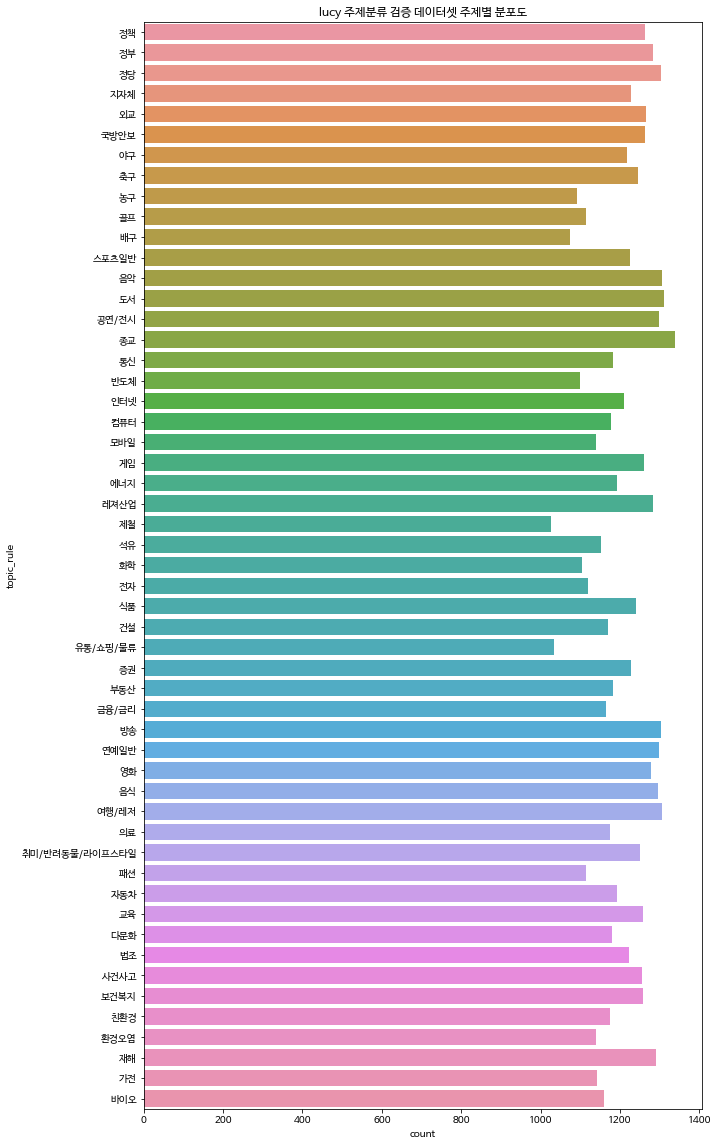

In [66]:
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,20))
plt.rc('font', family='NanumBarunGothic') 
sns.countplot(y="topic_rule", data=inter_data)
plt.title("lucy 주제분류 검증 데이터셋 주제별 분포도")
plt.show()

In [67]:
!pip install git+https://github.com/SKT-AI/KoBART#egg=kobart

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Cloning https://github.com/SKT-AI/KoBART to /tmp/pip-install-lfwvqke3/kobart_d6233cd66a654285a67d2e771ab2506d
  Running command git clone -q https://github.com/SKT-AI/KoBART /tmp/pip-install-lfwvqke3/kobart_d6233cd66a654285a67d2e771ab2506d
     |████████████████████████████████| 132 kB 5.3 MB/s 
     |████████████████████████████████| 814 kB 42.5 MB/s 
     |████████████████████████████████| 776.8 MB 17 kB/s 
     |████████████████████████████████| 1.9 MB 50.7 MB/s 
     |████████████████████████████████| 829 kB 63.3 MB/s 
     |████████████████████████████████| 880 kB 52.1 MB/s 
     |████████████████████████████████| 3.3 MB 32.5 MB/s 
     |████████████████████████████████| 9.1 MB 46.6 MB/s 
     |████████████████████████████████| 79 kB 8.8 MB/s 
     |████████████████████████████████| 127 kB 62.9 MB/s 
  Created wheel for kobart: filename=kobart-0.5.1-py3-none-any.whl size=9583 sha25

In [69]:
!pip install torchtext==0.8.1

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 7.0 MB 4.9 MB/s 
  Attempting uninstall: torchtext
    Found existing installation: torchtext 0.13.1
    Uninstalling torchtext-0.13.1:
      Successfully uninstalled torchtext-0.13.1


In [ ]:
!python /content/drive/MyDrive/DL/topic_class_POC/source/lucy.py --gpus 1 --max_epochs 3 --default_root_dir .cache --gradient_clip_val 1.0

INFO:root:Namespace(accelerator=None, accumulate_grad_batches=1, amp_backend='native', amp_level='O2', auto_lr_find=False, auto_scale_batch_size=False, auto_select_gpus=False, automatic_optimization=None, batch_size=6, benchmark=False, cachedir='/content/.cache', check_val_every_n_epoch=1, checkpoint_callback=True, default_root_dir='.cache', deterministic=False, distributed_backend=None, enable_pl_optimizer=None, fast_dev_run=False, flush_logs_every_n_steps=100, gpus=1, gradient_clip_val=1.0, limit_predict_batches=1.0, limit_test_batches=1.0, limit_train_batches=1.0, limit_val_batches=1.0, log_every_n_steps=50, log_gpu_memory=None, logger=True, lr=5e-05, max_epochs=3, max_seq_len=512, max_steps=None, min_epochs=None, min_steps=None, move_metrics_to_cpu=False, multiple_trainloader_mode='max_size_cycle', num_nodes=1, num_processes=1, num_sanity_val_steps=2, overfit_batches=0.0, plugins=None, precision=32, prepare_data_per_node=True, process_position=0, profiler=None, progress_bar_refresh

In [ ]:
import torch, gc
gc.collect()
torch.cuda.empty_cache()

In [ ]:
!nvidia-smi

Tue Sep 20 04:20:42 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   54C    P0    26W /  70W |    940MiB / 15109MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
!ls